# PyTorch Computer Vision

This is a Computer Vision notebook from the **FashionMIST** Pytorch dataset.

https://docs.pytorch.org/vision/0.22/generated/torchvision.datasets.FashionMNIST.html

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 0. Computer vision libraries in Pytorch

* torchvision - base domain library for PyTorch computer vision
* torchvision.datasets - get datasets and data loading functions for computer vision here
* torchvision.models - get pretrained computer vision models that you can leverage for your own problems
* torchvision.transforms - functions for manipulating your vision data (images) to be suitable for use with an ML model
* torch.utils.data.Dataset - Base dataset class for PyTorch
* torch.utils.data.DataLoader - Creates a Python iterable over a dataset

In [ ]:
# import PyTorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# Check the version
print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


## 1. Getting a data set

In [ ]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = 'data', # where to download to?
    train = True, # do we want the traing dataset?
    download = True, # do we want to download?
    transform = torchvision.transforms.ToTensor(), # How do we want ot transofrm the data?
    target_transform = None # do we want to transform the target? no, we want to see how they com
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 273kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.48MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.5MB/s]


In [ ]:
# See the length
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
# Check some information
image.shape, image.ndim

(torch.Size([1, 28, 28]), 3)

In [ ]:
# Find some information about the classes names
class_names = train_data.classes
class_names, type(class_names)

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 list)

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# Check the shape
print(f'Image shape: {image.shape} - [color channels, height, width]')
print(f'Image label: {class_names[label]}')

Image shape: torch.Size([1, 28, 28]) - [color channels, height, width]
Image label: Ankle boot


### 1.2 Visualizaing our data

In [ ]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
image, label = train_data[0]
print(label)
image.squeeze().shape

9


torch.Size([28, 28])

In [ ]:
image, label = train_data[0]
print(label)
image.squeeze().ndim

9


2

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

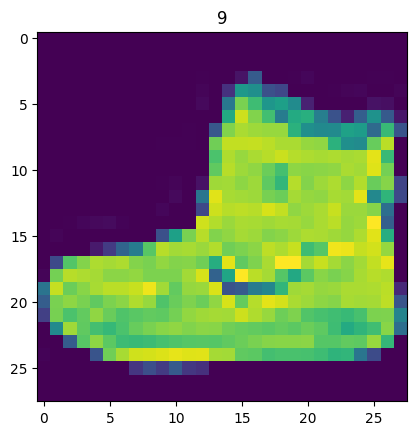

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze()) # matplotlib expects color channel at last
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

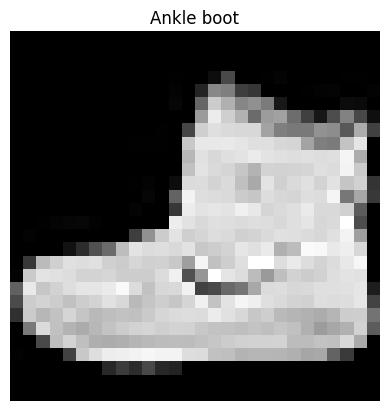

In [ ]:
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis(False)

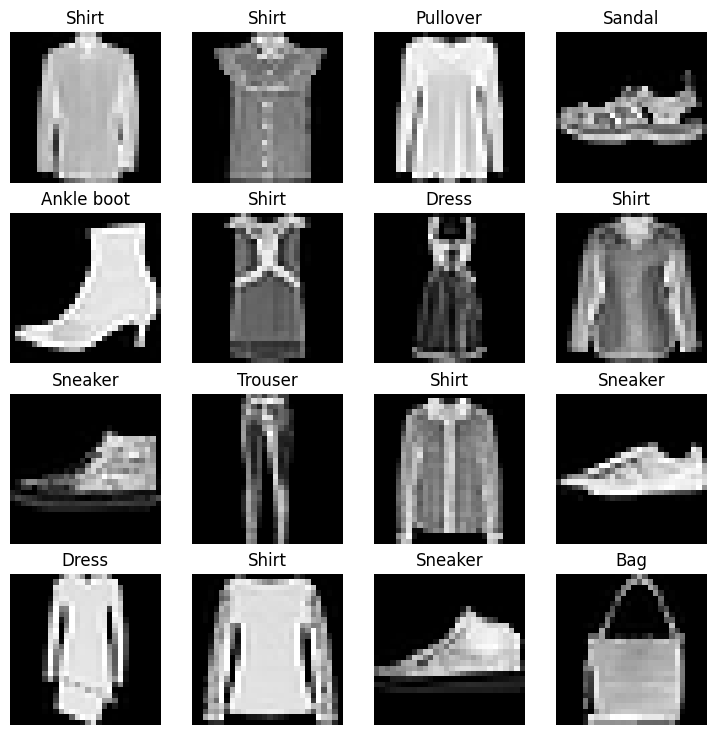

In [ ]:
# Plot more iamges
torch.manual_seed(91)
fig = plt.figure(figsize = (9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  # print(img.shape)
  plt.imshow(img.squeeze(), cmap = 'gray')
  plt.title(class_names[label])
  plt.axis(False)

#### Behind scenes

In [ ]:
for i in range(1, 4 * 4 + 1):
  print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [ ]:
torch.randint(0, 10, size = [1]).item()

1

In [ ]:
torch.randint(0, len(train_data), size = [1]).item()

58097

## 2. Prepare DataLoader
Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to run our data into batches (or mini batches)

Why would we do this?

1. It is more computantionally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break itdown to 32 images at a time (batch size of 32)
2. It gives our neural network more chances to update it's gradients per epoch

For more on mini-batches search for Large Scale Machine Learning | Mini Batch Gradient Descent.

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset = train_data, # 60.000 images
                        batch_size = BATCH_SIZE,
                        shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False # our model will never see the testdata so it does not matter
                             )
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79e7ccfac1a0>,
 <torch.utils.data.dataloader.DataLoader at 0x79e7cd2460c0>)

In [ ]:
# Let's check out what we've created
print(f'DataLoaders: {train_dataloader, test_dataloader}')
print(f'Length of train_dataloader: {len(train_dataloader)} batches of {train_dataloader.batch_size}')
print(f'Length of test_datalaoder: {len(test_dataloader)} batches of {test_dataloader.batch_size}')

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x79e7ccfac1a0>, <torch.utils.data.dataloader.DataLoader object at 0x79e7cd2460c0>)
Length of train_dataloader: 1875 batches of 32
Length of test_datalaoder: 313 batches of 32


In [ ]:
# Check out what's inside the training datalaoder
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
train_labels_batch

tensor([1, 4, 6, 1, 0, 7, 3, 1, 4, 2, 2, 4, 1, 8, 8, 7, 6, 4, 9, 1, 1, 5, 5, 9,
        0, 2, 6, 4, 1, 1, 9, 7])

In [ ]:
torch.randint(0, len(train_features_batch), size = [1]).item()

20

In [ ]:
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
random_idx

8

Image size: torch.Size([1, 28, 28])
Label: 9, labelsize: torch.Size([])


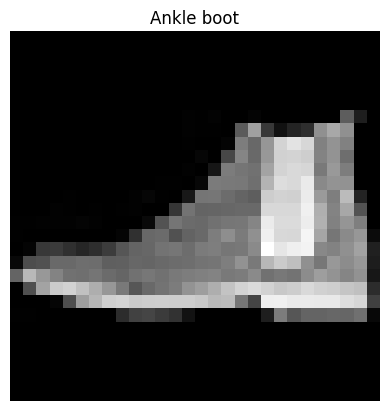

In [ ]:
# Show a sample
torch.manual_seed(91)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image size: {img.shape}')
print(f'Label: {label}, labelsize: {label.shape}')

## 3. Model 0: Build a baseline model

When starting to build a series of ML modelling experiments, it's bets practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequient model/experiments.

In other words: start simply and add complexity when necesary

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happend
print(f'Shape before flattening: {x.shape} ->[color_channels, height, width]')
print(f'Shape after flattening: {output.shape} ->[color_channels, height * width]')

Shape before flattening: torch.Size([1, 28, 28]) ->[color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) ->[color_channels, height * width]


In [ ]:
# On the baseline model we are going to use a linear layer, that's why we need to use a single vector
print(output.shape)
print(output[:, :10])

torch.Size([1, 784])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0667]])


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # torch.Size([1, 28, 28]) --> torch.Size([1, 784])
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
len(class_names)

10

In [ ]:
torch.manual_seed(91)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784,# this is 28 * 28
    hidden_units = 10, # How many units are in the hidden layer
    output_shape = len(class_names)
).to(device)

In [ ]:
# Baseline model
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[ 0.0954,  0.1089, -0.2456, -0.1215, -0.5316,  0.2412,  0.4144, -0.0476,
          0.1372, -0.3556]], grad_fn=<AddmmBackward0>)

### 3.1 Setup Loss, ptimizer and evaluation metrics

* Loss function - Since we are working with multi-class data, our loss function will be nn.CrossEntropyLoss()
* Optimizer - our optimizer torch.optim.SGD()
* Evaluation metric - since we're working on a classification problem

In [ ]:
import requests
from pathlib import Path

# Dowload helper function from Learn PyTorch repo
if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists, skipping download...')
else:
  print('Downloading helper_functios.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/af6548e52663c8395fe2777bd0fbfd6ac85fd6f8/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

In [ ]:
# import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn= nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

### 3.2 Creating a function to time out experiments
ML is very experimental. Two of the main things you'll of want to track here are:

1. Model's performance (loss and accuracy values)

2. How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end = float,
                     device: torch.device = None):
  """
  Prints difference between start and end time.
  """
  total_time = end - start
  print(f'Train time on {device}: {total_time:.3f} seconds')
  return total_time

In [ ]:
start_time = timer()
# some code here
end_time = timer()
print_train_time(start = start_time, end = end_time, device = 'cpu')

Train time on cpu: 0.000 seconds


5.042799995180758e-05

### 3.3 Creating a training loop and training model on batches of data

1. Loop through epochs
2. Loop through training batches, perform trainin steps, calculate the train loss per batch
3. Loop through testing batches, perform testing steps, claculate the test loss per batch
4. Print out what's happening
5. Time it all

In [ ]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the time
torch.manual_seed(91)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 10

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n----')
  ### Training
  train_loss = 0 # first is going to be 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X) # these are logits

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f'Tamaño del batch: {len(X)}')
      print(f'Número del lote: {batch}')
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples')

  # Divide total train loss by length of train data loader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  with torch.inference_mode(): # This deactivate the gradients
    for X_test, y_test in test_dataloader: # we dont need to keep track of the batches
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true = y_test,
                              y_pred = test_pred.argmax(dim = 1)) # comparing the true label with the max value of test_pred

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # print out what´s happening
  print(f'\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
----
Tamaño del batch: 32
Número del lote: 0
Looked at 0/60000 samples
Tamaño del batch: 32
Número del lote: 400
Looked at 12800/60000 samples
Tamaño del batch: 32
Número del lote: 800
Looked at 25600/60000 samples
Tamaño del batch: 32
Número del lote: 1200
Looked at 38400/60000 samples
Tamaño del batch: 32
Número del lote: 1600
Looked at 51200/60000 samples

Train loss: 0.6301 | Test loss: 0.5298, Test acc: 81.2400
Epoch: 1
----
Tamaño del batch: 32
Número del lote: 0
Looked at 0/60000 samples
Tamaño del batch: 32
Número del lote: 400
Looked at 12800/60000 samples
Tamaño del batch: 32
Número del lote: 800
Looked at 25600/60000 samples
Tamaño del batch: 32
Número del lote: 1200
Looked at 38400/60000 samples
Tamaño del batch: 32
Número del lote: 1600
Looked at 51200/60000 samples

Train loss: 0.4955 | Test loss: 0.5037, Test acc: 82.2384
Epoch: 2
----
Tamaño del batch: 32
Número del lote: 0
Looked at 0/60000 samples
Tamaño del batch: 32
Número del lote: 400
Looked at 12800/6000

## 4. Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(91)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = device):
  """
  Returns a dictionary containing the results of model predicting on data_loader.
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim = 1))
      # print(loss)

    # Scale loss and acc to find the average loss/acc
    loss /= len(data_loader)
    acc /= len(data_loader)


    return {'model_name': model.__class__.__name__, # only works when model was created with a class
            'model_loss': loss.item(),
            'model_acc': acc}

model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46377164125442505,
 'model_acc': 83.89576677316293}

## 5. Set up deivice agnostic code

In [ ]:
# See if cuda is available
torch.cuda.is_available()

False

In [ ]:
# # setup device agnostic code
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

Does we need non linearity from the above model? The model did pretty good without non-linearity functions.

## 6. Model 1: Building a better model with non-linearity

In [ ]:
# Create a model with non-linear layer
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # Flatten inputs into a single vector
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
# Create an instance of model_1
torch.manual_seed(91)
model_1 = FashionMNISTModelV1(input_shape = 784,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.1 Setup loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params = model_1.parameters(), # Tries to update our model´s parameters to reduce the loss
                            lr = 0.1)

### 6.2 Functionazing training and evaluation/testing loop

Let's create a function for:

* training loop - train_step()
* testing loop - test_step()

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """
  Performs a training with model trying to learn on data_loader
  """
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to llop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X) # remember that this are logits

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true = y, # accumulate accuracy
                             y_pred = y_pred.argmax(dim = 1)) # go from logits -> prediction labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f'Batch Size: {len(X)}')
      print(f'Batch Number: {batch}')
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples')

  # Divide total train loss and acc by length of train data loader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f'Train Loss: {train_loss:.5f} | Train acc:{train_acc:.2f}%')

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """
  Performs a testing loop step on model going over data_loader.
  """
  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode(): # This deactivate the gradients
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true = y,
                             y_pred = test_pred.argmax(dim = 1)) # go fromlogits -> predictions labels

    # Adjust the metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f'Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%')

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_cpu = timer()

# Set Epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n--------')
  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Batch Size: 32
Batch Number: 0
Looked at 0/60000 samples
Batch Size: 32
Batch Number: 400
Looked at 12800/60000 samples
Batch Size: 32
Batch Number: 800
Looked at 25600/60000 samples
Batch Size: 32
Batch Number: 1200
Looked at 38400/60000 samples
Batch Size: 32
Batch Number: 1600
Looked at 51200/60000 samples
Train Loss: 1.21712 | Train acc:58.93%
Test Loss: 1.01889 | Test acc: 65.20%
Epoch: 1
--------
Batch Size: 32
Batch Number: 0
Looked at 0/60000 samples
Batch Size: 32
Batch Number: 400
Looked at 12800/60000 samples
Batch Size: 32
Batch Number: 800
Looked at 25600/60000 samples
Batch Size: 32
Batch Number: 1200
Looked at 38400/60000 samples
Batch Size: 32
Batch Number: 1600
Looked at 51200/60000 samples
Train Loss: 0.98421 | Train acc:66.96%
Test Loss: 0.88471 | Test acc: 71.21%
Epoch: 2
--------
Batch Size: 32
Batch Number: 0
Looked at 0/60000 samples
Batch Size: 32
Batch Number: 400
Looked at 12800/60000 samples
Batch Size: 32
Batch Number: 800
Looked at 25600/6

In [ ]:
# Get model_1 results dictionary
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8557549118995667,
 'model_acc': 71.77515974440895}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46377164125442505,
 'model_acc': 83.89576677316293}

> **Note:** Sometimes, depending on your data/hardware you might find that your mdoel trains faster on CPU than GPU.
>
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
> 2.The hardware you are using has a better CPU in terms of compute capability than de GPU.

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also Knows ConvNets.

CNN's are known for their capabilities to find patterns in visual data

https://poloclub.github.io/cnn-explainer/

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 7 * 7,
                  out_features = output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f'Outputshape of conv_block_1: {x.shape}')
    x = self.conv_block_2(x)
    #print(f'Outputshape of conv_block_2: {x.shape}')
    x = self.classifier(x)
    #print(f'Outputshaoe o classifier: {x.shape}')
    return x

In [ ]:
torch.manual_seed(91)
model_2 = FashionMNISTModelV2(input_shape = 1, # number of channel in our images
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

#### Trick to find te input and outpput shapes of each of our Layers

In [ ]:
rand_image_tensor = torch.randn(size = (1, 28, 28))
rand_image_tensor

tensor([[[ 1.5666e-01,  3.7039e-01, -8.4617e-01, -8.9908e-01,  1.6844e-01,
          -2.6514e+00,  5.8712e-01, -1.4847e+00,  1.0758e+00,  2.5242e-01,
           4.3157e-01,  1.1161e+00, -1.0374e+00,  1.5059e+00,  1.0693e+00,
           1.7342e-01, -1.2579e+00, -3.1794e-01, -8.4117e-01, -7.9321e-01,
           3.7054e-01, -3.6431e-01,  8.2681e-01,  3.2425e-01,  6.1178e-01,
           5.9304e-01, -9.0093e-01, -4.7265e-01],
         [-2.2897e-01,  1.6517e+00, -4.6253e-01,  1.0149e+00, -1.5928e+00,
          -1.4463e+00, -2.0002e+00, -1.4645e+00, -2.5151e+00, -9.8076e-01,
          -8.1135e-01, -3.2055e-01,  1.2670e-02, -1.6700e+00,  1.0777e+00,
          -2.5153e+00,  7.5006e-01, -9.6101e-01,  9.6606e-01, -1.5944e+00,
          -4.0229e-01, -2.4084e-03, -1.5758e+00,  6.6490e-01,  1.6136e-01,
           8.8886e-01, -5.0375e-01, -6.4821e-01],
         [-1.9511e-01,  1.6955e-01, -7.8956e-01,  5.8495e-01, -4.5687e-01,
           1.7732e+00, -1.4736e+00,  1.4315e+00,  3.8973e-01,  3.9400e-01,


In [ ]:
model_2(rand_image_tensor.unsqueeze(0).to(device)) # this will show a shape error

tensor([[ 0.0709,  0.0007,  0.0617,  0.0583, -0.0130, -0.0919,  0.0486, -0.0761,
          0.0620,  0.0549]], grad_fn=<AddmmBackward0>)

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
image.squeeze().shape

torch.Size([28, 28])

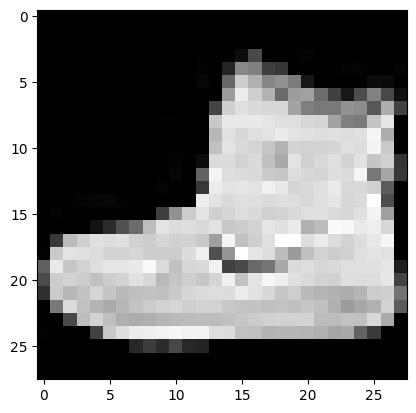

In [ ]:
plt.imshow(image.squeeze(), cmap = 'gray')

### 7.1 Steping through nn.Conv2d

See the documentation for nn.Conv2d on pytorch

In [ ]:
import torch
from torch import nn
torch.manual_seed(91)

# Create a batch of images
images = torch.randn(size = (32, 3, 64, 64))
test_image = images[0]

print(f'Image bath shape: {images.shape}')
print(f'Single image shape: {test_image.shape}') # has no batch
print(f'Test image:\n {test_image}')

Image bath shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[-0.1259, -0.8008, -0.3980,  ...,  0.0935,  1.7927,  1.4019],
         [ 0.2070,  1.8585, -0.3567,  ..., -1.8232, -0.5006,  0.1460],
         [-0.6374,  1.3236, -0.0562,  ...,  0.1420, -0.1232,  0.5380],
         ...,
         [ 0.1622, -0.8167, -0.3765,  ..., -1.0874,  1.8441, -1.9330],
         [ 0.9317,  1.6585,  1.3888,  ...,  0.2244,  0.0348, -1.6057],
         [ 0.1680,  1.0058, -1.5036,  ...,  2.2627, -1.3505,  0.1269]],

        [[ 0.0828,  1.8636, -1.6991,  ..., -0.6572,  0.6771,  0.5578],
         [-0.6666,  1.4349, -2.3736,  ..., -0.2099,  0.4445,  0.0260],
         [-0.8265, -0.1369, -0.1807,  ..., -0.4049,  1.7475, -0.3380],
         ...,
         [ 0.2857,  2.8520, -0.8632,  ..., -0.9764,  1.3856,  1.3328],
         [ 0.4181,  1.1540,  0.9338,  ...,  1.3828,  1.1288,  0.2615],
         [ 0.7001, -0.4653, -0.1041,  ...,  0.5303, -2.5845, -2.1867]],

        [[-0.

In [ ]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels = 3, # colour channels
                       out_channels = 10, # hidden units
                       kernel_size = (3, 3), # Kernel does the mathematical operation by pixel from https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
                       stride = 1, # jumping over 1 pixel on the original input
                       padding = 0)

# Pss the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0)) # this will create the batch
conv_output

tensor([[[[ 1.9576e-01, -5.1600e-01, -8.8006e-01,  ...,  1.7466e+00,
            5.2580e-01, -7.6325e-01],
          [ 4.0010e-01,  9.4145e-01, -8.4466e-01,  ...,  3.8090e-01,
            8.4939e-01, -4.9514e-01],
          [-1.4964e+00,  5.7619e-01,  3.7963e-01,  ...,  2.8984e-01,
            5.1970e-01,  1.4043e-01],
          ...,
          [-3.0838e-01,  5.7850e-01, -5.1724e-01,  ...,  4.7316e-01,
           -4.1181e-01, -6.7844e-01],
          [ 5.9807e-01,  9.7422e-01,  1.2861e+00,  ..., -1.3092e-01,
           -1.6461e-01, -1.8946e-01],
          [ 5.5042e-01, -5.2331e-01, -4.5544e-01,  ...,  5.0699e-01,
           -1.4549e-01,  7.3617e-01]],

         [[ 1.7094e-01,  5.8298e-01,  2.2912e-01,  ...,  3.0441e-01,
            4.9787e-01, -2.9757e-01],
          [-9.1970e-02,  3.8228e-01, -3.2228e-01,  ..., -7.6725e-01,
            6.6729e-01, -4.6532e-01],
          [-1.7265e-01,  6.1416e-01, -5.1684e-01,  ..., -8.4729e-01,
            5.9882e-01, -8.2955e-02],
          ...,
     

In [ ]:
test_image.shape, test_image.unsqueeze(dim = 0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

### 7.2 Stepping through nn.MaxPool2d

https://docs.pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Print out the original shape without unsqueezed dimension
print(f' Test image original shape: {test_image.shape}')
print(f'Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}')

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass data through just conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim = 0))
print(f'Shape after going through conv_layer(): {test_image_through_conv.shape}')

# Pass data through max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f'Shape after going conv_layer() and max_pool_layer: {test_image_through_conv_and_max_pool.shape}')

 Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going conv_layer() and max_pool_layer: torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(91)

# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size = (1, 1, 2, 2))
print(f'\nRandom tensor:\n{random_tensor}')
print(f'Random tensor shape: {random_tensor.shape}')

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f'\nMax pool tensor:\n {max_pool_tensor}')
print(f'Max pool tensor shape: {max_pool_tensor.shape}')


Random tensor:
tensor([[[[-1.0615, -1.5696],
          [ 0.0660,  0.5608]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.5608]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Set up loss function and optimizer for model_2

In [ ]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr= 0.1)

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-0.0287,  0.0938, -0.1805],
                        [-0.0742,  0.2693,  0.3082],
                        [ 0.2623,  0.2832, -0.1545]]],
              
              
                      [[[-0.1036,  0.1047,  0.3005],
                        [-0.3301, -0.2479, -0.1723],
                        [ 0.3085,  0.0111, -0.0957]]],
              
              
                      [[[ 0.0765, -0.3225, -0.3165],
                        [-0.1123, -0.0086,  0.1912],
                        [ 0.1385,  0.2071,  0.0503]]],
              
              
                      [[[-0.0632,  0.2083, -0.1801],
                        [ 0.2222,  0.2172,  0.1414],
                        [ 0.1816, -0.2765, -0.3144]]],
              
              
                      [[[-0.3099,  0.2787, -0.1235],
                        [ 0.3257, -0.0724, -0.1471],
                        [-0.3245, -0.2701, -0.1865]]],
              
              
      

### 7.4 Training and testing model_2 using our training and test functions

In [ ]:
torch.manual_seed(91)
torch.cuda.manual_seed(91)

# Measure time
from timeit import default_timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 10
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n-------')
  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model = model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device = device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------
Batch Size: 32
Batch Number: 0
Looked at 0/60000 samples
Batch Size: 32
Batch Number: 400
Looked at 12800/60000 samples
Batch Size: 32
Batch Number: 800
Looked at 25600/60000 samples
Batch Size: 32
Batch Number: 1200
Looked at 38400/60000 samples
Batch Size: 32
Batch Number: 1600
Looked at 51200/60000 samples
Train Loss: 0.56709 | Train acc:79.59%
Test Loss: 0.40116 | Test acc: 85.06%
Epoch: 1
-------
Batch Size: 32
Batch Number: 0
Looked at 0/60000 samples
Batch Size: 32
Batch Number: 400
Looked at 12800/60000 samples
Batch Size: 32
Batch Number: 800
Looked at 25600/60000 samples
Batch Size: 32
Batch Number: 1200
Looked at 38400/60000 samples
Batch Size: 32
Batch Number: 1600
Looked at 51200/60000 samples
Train Loss: 0.34898 | Train acc:87.50%
Test Loss: 0.38367 | Test acc: 86.54%
Epoch: 2
-------
Batch Size: 32
Batch Number: 0
Looked at 0/60000 samples
Batch Size: 32
Batch Number: 400
Looked at 12800/60000 samples
Batch Size: 32
Batch Number: 800
Looked at 25600/6000

In [ ]:
# Get model_2 results
model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.27587777376174927,
 'model_acc': 90.37539936102236}

In [ ]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8557549118995667,
 'model_acc': 71.77515974440895}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46377164125442505,
 'model_acc': 83.89576677316293}

## 8. Compare Model Results and Training Time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.463772,83.895767
1,FashionMNISTModelV1,0.855755,71.775160
2,FashionMNISTModelV2,0.275878,90.375399


In [ ]:
# Add training time to results comparison
compare_results['training time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training time
0,FashionMNISTModelV0,0.463772,83.895767,158.626858
1,FashionMNISTModelV1,0.855755,71.775160,55.072442
2,FashionMNISTModelV2,0.275878,90.375399,569.905233


Text(0, 0.5, 'model')

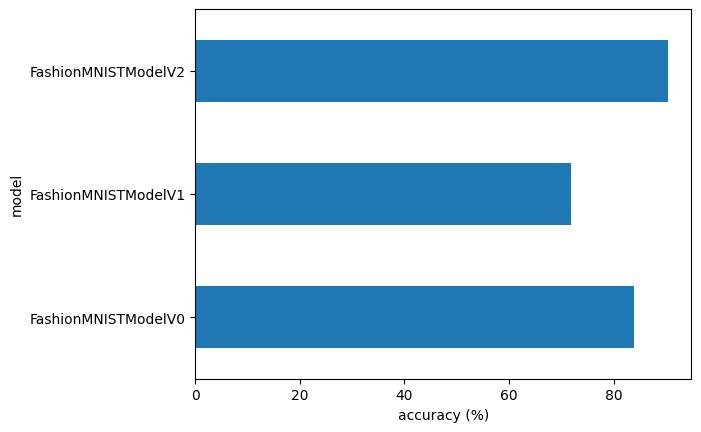

In [ ]:
# Visualize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind = 'barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model')

## 9. Make and evaluate random prediction with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample
      sample = torch.unsqueeze(sample, dim = 0).to(device)

      # Forward pass (model will output raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob= torch.softmax(pred_logit.squeeze(), dim = 0)

      # Get pred_prob off the gpu for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(91)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

In [ ]:
test_samples[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

Text(0.5, 1.0, 'Sneaker')

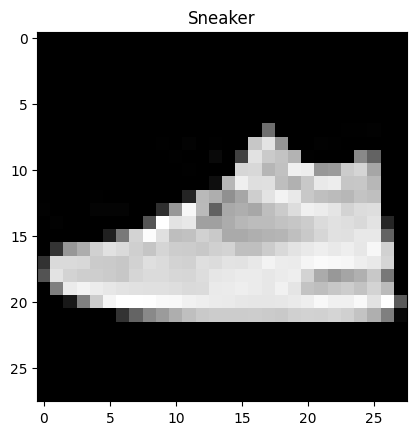

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap= 'gray')
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model = model_2,
                              data = test_samples)

# View the firsttwo prediction probabilitites
pred_probs[:2]

tensor([[7.2608e-07, 1.6175e-11, 1.7086e-09, 1.4691e-10, 1.3297e-10, 1.3316e-05,
         3.8221e-09, 9.9955e-01, 1.7191e-06, 4.2950e-04],
        [1.3756e-08, 4.1447e-10, 5.0942e-10, 1.6083e-08, 5.7431e-09, 3.3438e-05,
         1.1841e-08, 9.9997e-01, 1.7581e-07, 6.3076e-08]])

In [ ]:
# Convert prediction probabilitites to labels
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([7, 7, 4, 1, 7, 1, 6, 0, 4])

In [ ]:
test_labels

[7, 7, 3, 1, 7, 1, 4, 3, 4]

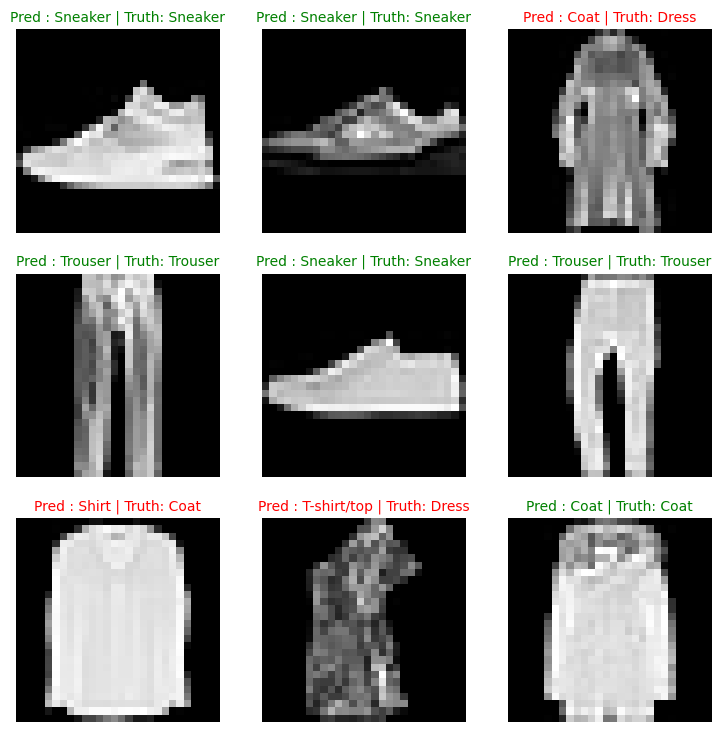

In [ ]:
# Plot Predictions
plt.figure(figsize = (9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # create subplot
  plt.subplot(nrows, ncols, i + 1)

  # Plot target image
  plt.imshow(sample.squeeze(), cmap= 'gray')

  # Find the prediction (in text, e.g 'Sandal')
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a tittle for the plot
  title_text = f'Pred : {pred_label} | Truth: {truth_label}'

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c = 'g')
  else:
    plt.title(title_text, fontsize = 10, c= 'r')

  plt.axis(False)

## 10 . Making confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually.

1. Make predictions withour trained model on the test dataset.
2. Make a confusion matric torchmetrichs. ConfusionMatrix - https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html
3. Plot the confusion matrix suing mlxtend.plotting.plot_confusion_matrix - https://rasbt.github.io/mlxtend/

In [ ]:
# import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = 'Making predictions...'):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction label
    y_pred = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim = 1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 6, 4, 8, 0, 2, 5, 7, 5,
        1, 6, 6, 0, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 9, 6, 7, 2, 1, 4, 6, 4, 6, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 1, 3, 3, 7, 8, 7, 0, 2, 6, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 7, 0, 3, 2,
        0, 6, 8, 3, 6, 7, 1, 0]), tensor([0, 1, 2, 2, 3, 6, 7, 6, 7, 8, 8, 7, 9, 4, 2, 8, 7, 6, 5, 2, 6, 4, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 1, 8, 6, 2, 1, 2, 8, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 3, 4,
        1, 3, 8, 6, 4, 7, 9, 3]), tensor([7, 2, 3, 8, 0, 9, 4, 7, 4, 8, 6, 5, 6, 1, 2, 8, 3, 0, 9, 1, 0, 9, 3, 6,
        7, 9, 9, 4, 4, 7, 1, 2]), tensor([3, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 2, 0]), tensor([7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 8, 1, 3, 4, 5, 6, 9, 2, 2, 8, 6, 4,
        3, 4, 7, 7, 3, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 6, 0, 2, 3, 0, 8, 3, 7, 4,
       

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f'mlxtend version: {mlxtend.__version__}')
  assert int(mlxtend.__version__.split(".")[1]) >= 19, 'mlxtend should be 0.19 or higher'
except:
  !pip install torchmetrics -U mlxtend
  print(f'mlxtend version: {mlxtend.__version__}')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 18.3 MB/s eta 0:00:00


NameError: name 'mlxtend' is not defined

In [ ]:
import mlxtend
print(mlxtend.__version__)

0.23.4


In [ ]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

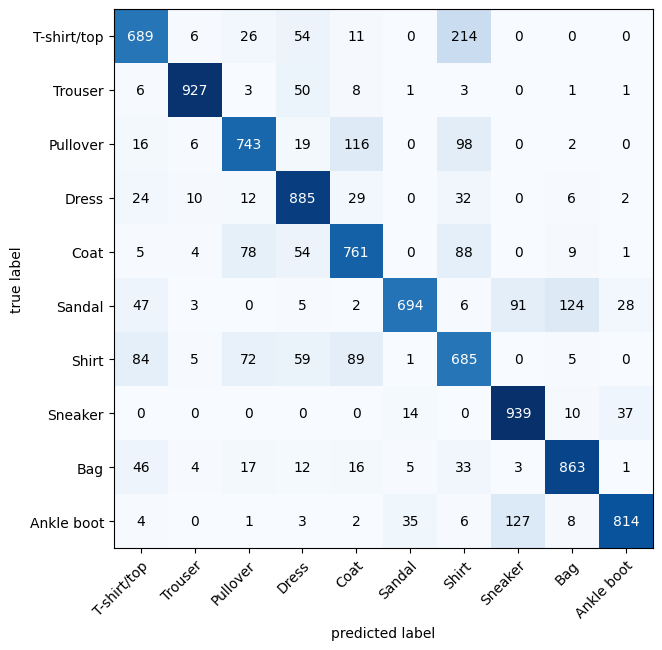

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to target
confmat = ConfusionMatrix(num_classes = len(class_names), task = 'multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize = (10, 7)
)

## 11. Save and load best performing model

In [ ]:
from pathlib import Path

# Create a model directory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True,
                 exist_ok = True)

# Create model save
MODEL_NAME = '03_pytorch_computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj = model_2.state_dict(), # this are our models learned parameters on the data set
           f = MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape = 1, # Number of color images on it's shape
                                     hidden_units = 10,
                                     output_shape = len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.27587777376174927,
 'model_acc': 90.37539936102236}

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.27587777376174927,
 'model_acc': 90.37539936102236}